<a href="https://colab.research.google.com/github/Lizi0630/DataScienceProject2024/blob/main/CSC_615_Project_2_Lizi_Wu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

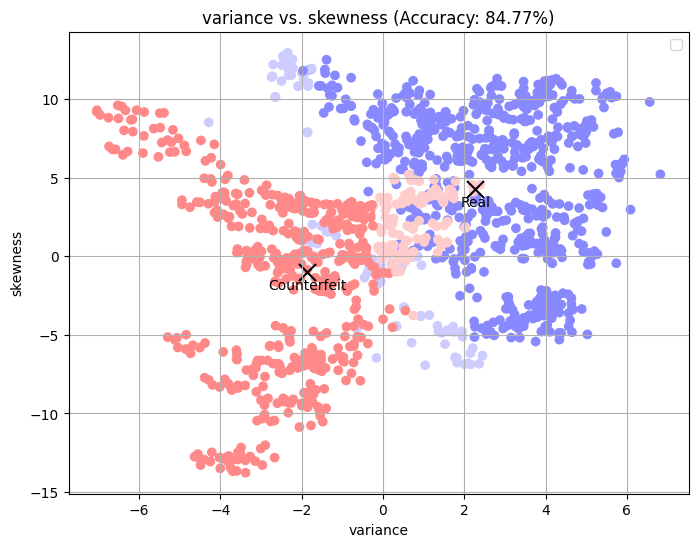

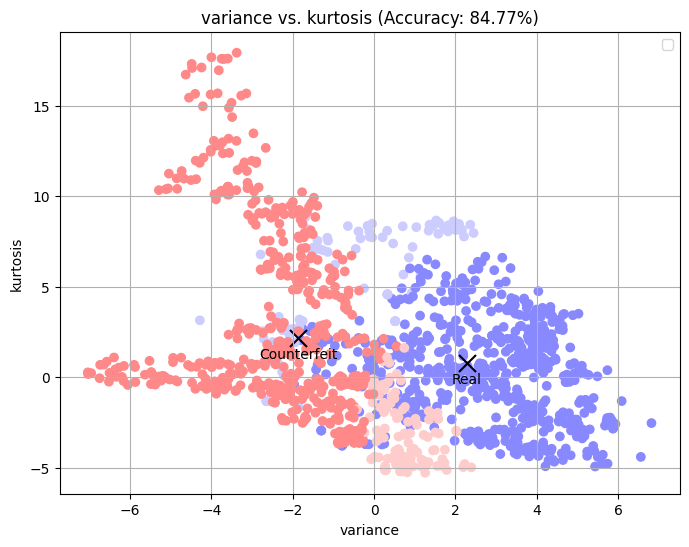

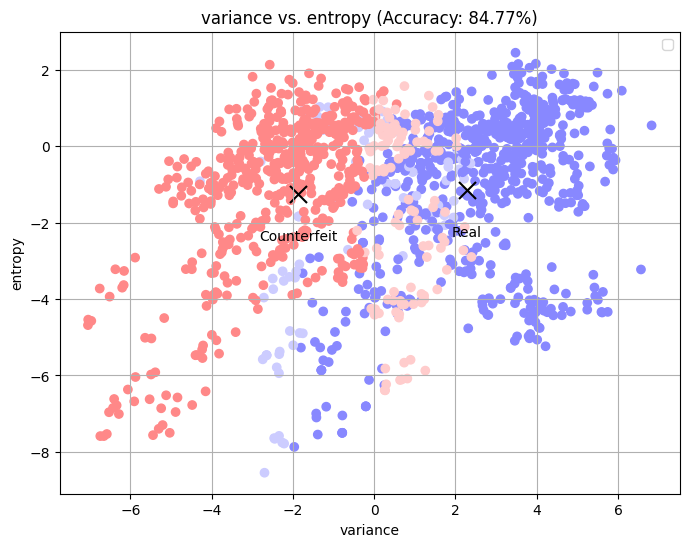

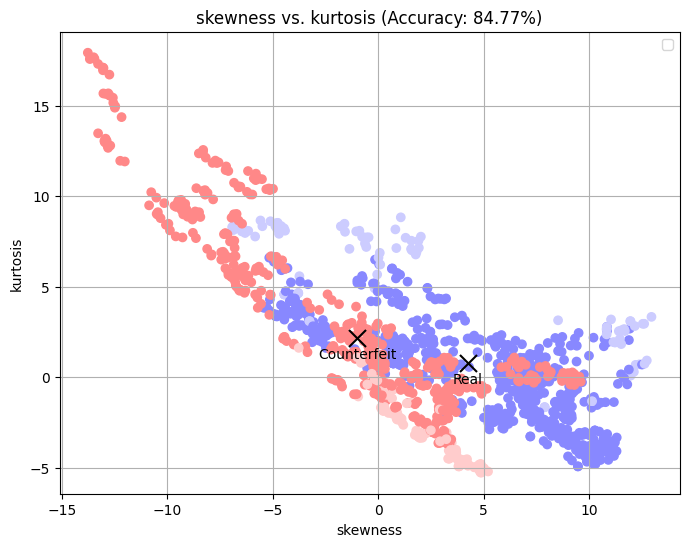

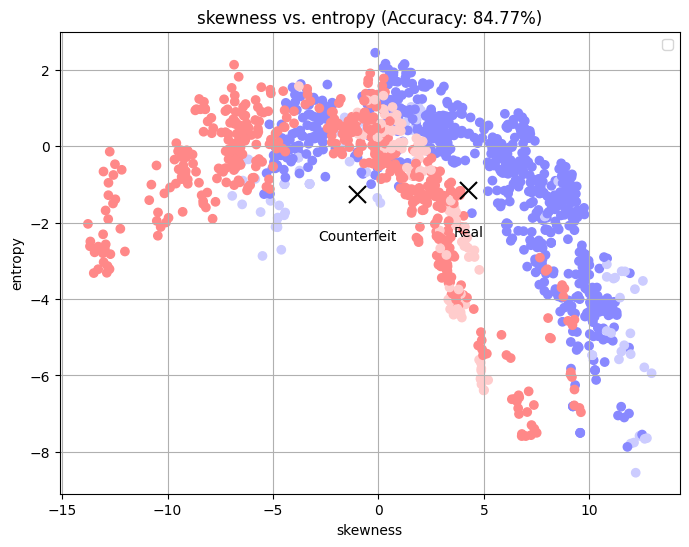

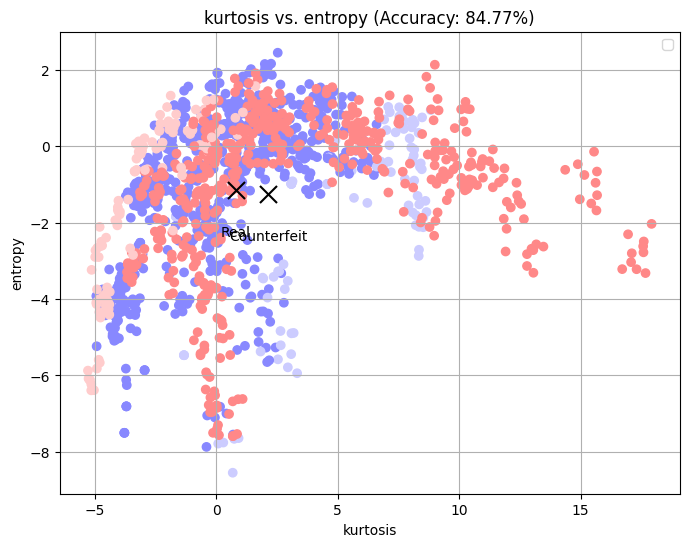

In [ ]:
# Introduction to Python, Project 2
# Student Name: Lizi Wu

#-------------------------------
# Section 1: Dataset Preparation
#-------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset for analysis.
df = pd.read_csv('data_banknote_authentication.csv')


#-------------------------------
# Section 2: Classification with Gaussian Probability Density Function
#-------------------------------
# Calculate the mean (centroid) and standard deviation for each class (Real=0, Counterfeit=1).
# Store the result as a DataFrame, where each row represents one of the classes,
# and each column contains the mean / standard deviation of a feature for that class.
centroids = df.groupby('counterfeit').mean()
stds = df.groupby('counterfeit').std()

# Define Gaussian PDF as a function to model feature distribution for classification.
def gaussian_pdf(x, mean, std):
  # This function returns the probability of 'x' given the distribution defined by 'mean' and 'std'.
  return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((x - mean) ** 2) / (2 * std ** 2))

# Classify observations based on calculated Gaussian probabilities
# Define a function to classify each observation based on the calculated Gaussian probabilities
def classify_observation(observation):
  # Extract centroids (means) for each feature within each class.
  # Centroids represent the average value of each feature for 'Real' and 'Counterfeit' banknotes.
  centroids_variance_real = centroids.loc[0, 'variance']
  centroids_skewness_real = centroids.loc[0, 'skewness']
  centroids_kurtosis_real = centroids.loc[0, 'kurtosis']
  centroids_entropy_real = centroids.loc[0, 'entropy']

  centroids_variance_counterfeit = centroids.loc[1, 'variance']
  centroids_skewness_counterfeit = centroids.loc[1, 'skewness']
  centroids_kurtosis_counterfeit = centroids.loc[1, 'kurtosis']
  centroids_entropy_counterfeit = centroids.loc[1, 'entropy']

  # Extract standard deviations for each feature within each class.
  # Standard deviations measure the amount of variation or dispersion of each feature from the mean.
  stds_variance_real = stds.loc[0, 'variance']
  stds_skewness_real = stds.loc[0, 'skewness']
  stds_kurtosis_real = stds.loc[0, 'kurtosis']
  stds_entropy_real = stds.loc[0, 'entropy']

  stds_variance_counterfeit = stds.loc[1, 'variance']
  stds_skewness_counterfeit = stds.loc[1, 'skewness']
  stds_kurtosis_counterfeit = stds.loc[1, 'kurtosis']
  stds_entropy_counterfeit = stds.loc[1, 'entropy']

  # Utilize the Gaussian PDF to calculate the likelihood that the observation's features
  # fit within the 'Real' or 'Counterfeit' feature distributions.
  # This involves comparing the observation's feature values to the distributions defined by the centroids and standard deviations.
  p_variance_model_real = gaussian_pdf(observation['variance'], centroids_variance_real, stds_variance_real)
  p_skewness_model_real = gaussian_pdf(observation['skewness'], centroids_skewness_real, stds_skewness_real)
  p_kurtosis_model_real = gaussian_pdf(observation['kurtosis'], centroids_kurtosis_real, stds_kurtosis_real)
  p_entropy_model_real = gaussian_pdf(observation['entropy'], centroids_entropy_real, stds_entropy_real)

  p_variance_model_counterfeit = gaussian_pdf(observation['variance'], centroids_variance_counterfeit, stds_variance_counterfeit)
  p_skewness_model_counterfeit = gaussian_pdf(observation['skewness'], centroids_skewness_counterfeit, stds_skewness_counterfeit)
  p_kurtosis_model_counterfeit = gaussian_pdf(observation['kurtosis'], centroids_kurtosis_counterfeit, stds_kurtosis_counterfeit)
  p_entropy_model_counterfeit = gaussian_pdf(observation['entropy'], centroids_entropy_counterfeit, stds_entropy_counterfeit)

  # Calculate the combined probability of the observation being 'Real' or 'Counterfeit' by multiplying
  # the probabilities of individual features.
  # 'Real' and 'Counterfeit' probabilities are computed separately.
  p_predicted_real = p_variance_model_real * p_skewness_model_real * p_kurtosis_model_real * p_entropy_model_real
  p_predicted_counterfeit = p_variance_model_counterfeit * p_skewness_model_counterfeit * p_kurtosis_model_counterfeit * p_entropy_model_counterfeit

  # The classification decision is made based on which cumulative probability is higher,
  # indicating a higher likelihood of belonging to that class.
  if p_predicted_real > p_predicted_counterfeit:
    return 'Real'
  else:
    return 'Counterfeit'

# Apply the classification function to the entire dataset to predict labels
df['predicted_label'] = df.apply(classify_observation, axis=1)


#-------------------------------
# Section 3: Visualization with Classification Results
#-------------------------------
# Create a mapping of actual vs. predicted label pairs to specific colors for visualization.
color_scheme = {('Real', 'Real'): '#8888ff', ('Real', 'Counterfeit'): '#ccccff',
             ('Counterfeit', 'Real'): '#ffcccc', ('Counterfeit', 'Counterfeit'): '#ff8888'}

# Assign a color to each row in the DataFrame based on its actual and predicted labels.
# This lambda function checks if the 'counterfeit' label is 0 (Real) or 1 (Counterfeit),
# then pairs it with the 'predicted_label' to fetch the corresponding color from the color_scheme.
df['color'] = df.apply(lambda row: color_scheme[( 'Real' if row['counterfeit'] == 0 else 'Counterfeit', row['predicted_label'])], axis=1)

# Define a plotting function to visually compare two features against each other,
# highlighting the centroids and using the assigned colors for classification accuracy.
def plot_feature_comparison(df, feature_x, feature_y, centroids):
  # Setup plot
  plt.figure(figsize=(8,6))
  plt.scatter(df[feature_x], df[feature_y], c=df['color'], alpha=1)

  # Mark centroids for visual reference
  plt.scatter(centroids.loc[0, feature_x], centroids.loc[0, feature_y], color='k', marker='x', s=150)
  plt.scatter(centroids.loc[1, feature_x], centroids.loc[1, feature_y], color='k', marker='x', s=150)

  # Label centroids on the plot, adjusting position for visibility
  plt.text(centroids.loc[0, feature_x], centroids.loc[0, feature_y] - 1.3, 'Real', color='black', ha='center', va='bottom')
  plt.text(centroids.loc[1, feature_x], centroids.loc[1, feature_y] - 1.3, 'Counterfeit', color='black', ha='center', va='bottom')

  # Calculate accuracy
  y_true = df['counterfeit']
  y_pred = df['predicted_label'].map({'Real': 0, 'Counterfeit': 1})
  accuracy = np.mean(y_true == y_pred)

  # Label and visualize the plot
  plt.title(f'{feature_x} vs. {feature_y} (Accuracy: {accuracy:.2%})')
  plt.xlabel(feature_x)
  plt.ylabel(feature_y)
  plt.grid(True)
  plt.legend()
  plt.show()

# Plot comparisons for all feature pairs
plot_feature_comparison(df, 'variance', 'skewness', centroids)
plot_feature_comparison(df, 'variance', 'kurtosis', centroids)
plot_feature_comparison(df, 'variance', 'entropy', centroids)
plot_feature_comparison(df, 'skewness', 'kurtosis', centroids)
plot_feature_comparison(df, 'skewness', 'entropy', centroids)
plot_feature_comparison(df, 'kurtosis', 'entropy', centroids)


In [ ]:
# Initialize an empty list to store color codes.
colors = []

# Iterate through each row of the DataFrame
for idx, row in df.iterrows():
    # Convert numeric label to string label for the actual value
    if row['counterfeit'] == 0:
        actual = 'Real'
    else:
        actual = 'Counterfeit'

    # Access the predicted label directly
    predicted = row['predicted_label']

    # Determine the color based on the combination of actual and predicted labels
    color = color_scheme[(actual, predicted)]

    # Append the determined color to the list
    colors.append(color)

# Assign the list of colors back to the 'color' column of the DataFrame.
df['color'] = colors